In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()

In [3]:
X, y = dataset.data, dataset.target

In [4]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [5]:
y_gt = np.zeros((y.shape[0], np.amax(y)+1))

for i in range(y.shape[0]):
    y_gt[i, y[i]] = 1

print(y_gt.shape)

(1797, 10)


In [6]:
# print(X[0])
print(y[0], y_gt[0])

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
def normalize_data(data): 

	# normalize/standardize the data
	""" Normalize the dataset X """
	l2 = np.atleast_1d(np.linalg.norm(data, ord=2, axis=1))
	l2[l2 == 0] = 1
	return data / np.expand_dims(l2, axis=1)

X_norm = normalize_data(X)

In [8]:
ratio = 0.6
num_train_samples = int(y.shape[0] * ratio)
X_train, y_train = X_norm[:num_train_samples], y_gt[:num_train_samples]
X_test, y_test = X_norm[num_train_samples:], y_gt[num_train_samples:]

In [9]:
print(y_train.shape, y_test.shape)

(1078, 10) (719, 10)


/Users/ritvik_handa/miniforge3/envs/mlenv/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


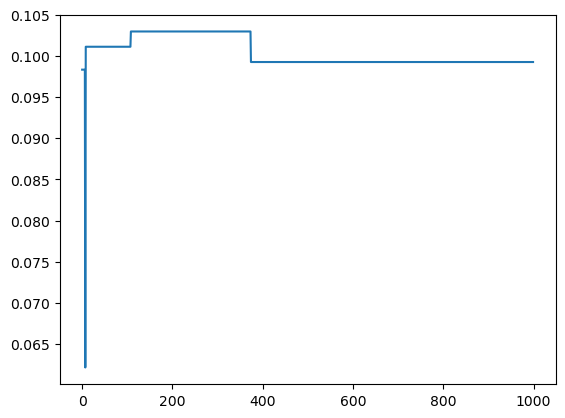

In [11]:
# def sigmoid(x):
#     y = 1/(1 + np.exp(-1*x))
#     return y

# def softmax(x):

def accuracy_score(y_pred, y_gt):
    y_pred = np.argmax(y_pred, axis=1)
    y_gt = np.argmax(y_gt, axis=1)
    accuracy = np.sum(y_pred == y_gt)/y_gt.shape[0]
    return accuracy

class CrossEntropyLoss:     # TODO: Make this work!!!
    def __init__(self):
        # Buffers to store intermediate results.
        self.current_prediction = None
        self.current_gt = None
        pass

    def __call__(self, y_pred, y_gt):
        # TODO: Calculate Loss Function
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = - y_gt * np.log(y_pred) - (1 - y_gt) * np.log(1 - y_pred)
        return loss

    def grad(self, y_pred, y_gt):
        # TODO: Calculate Gradients for back propagation
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        gradient = - (y_gt / y_pred) + (1 - y_gt) / (1 - y_pred)
        return gradient
    
import matplotlib.pyplot as plt 
from utils import SigmoidActivation, SoftmaxActivation
learning_rate = 0.001
    

sigmoid = SigmoidActivation()
softmax = SoftmaxActivation()
loss_function = CrossEntropyLoss()


# Initialize Params
w1 = np.random.uniform(0,1, (64, 16))
b1 = np.zeros((1, 16))

w2 = np.random.uniform(0, 1, (16, 10))
b2 = np.zeros((1, 10))

losses = []
accuracies = []
for i in range(1000):

    # Forward
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
#     print(a1.shape)

    z2 = a1.dot(w2) + b2
    a2 = softmax(z2)
#     print(a2.shape)

    loss = np.sum(loss_function(a2, y_train))
    accuracy = accuracy_score(a2, y_train)
    accuracies.append(accuracy)
    losses.append(loss)

    # Backward
    da2 = loss_function.grad(a2, y_train)


    dz2 = da2 * softmax.grad(z2)
    dw2 = a1.T.dot(dz2)
    db2 = np.sum(dz2, axis=0)

    da1 = dz2.dot(w2.T)
    dz1 = sigmoid.grad(z1) * da1
    dw1 = X_train.T.dot(dz1)
    db1 = np.sum(dz1, axis=0)


    # Update weights (by gradient descent)
    # Move against the gradient to minimize loss
    w2  -= learning_rate * dw2
    b2 -= learning_rate * db2
    w1  -= learning_rate * dw1
    b1 -= learning_rate * db1
    
# plt.plot(losses)
plt.plot(accuracies)
# print(accuracies)

In [12]:
print(accuracies[-1])

0.09925788497217068
